In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
DEVICE    

device(type='cuda')

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',train=True, download = True, transform = transforms.ToTensor())
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',train=False, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset,batch_size=BATCH_SIZE,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for data,label in  train_dataset:
  print(data.shape)
  break

torch.Size([3, 32, 32])


In [ ]:
# 모델 설계
class Net(nn.Module):
  def __init__(self) -> None:
     super().__init__()
     self.fc1 = nn.Linear(3*32*32,512)
     self.fc2 = nn.Linear(512,256)
     self.fc3 = nn.Linear(256,10)
  def forward(self, x):
    x = x.view(-1,3*32*32)
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    x = torch.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x  

In [ ]:
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm
def train(model, train_loader, optimizer):
  model.train() # 학습
  # 모델 성능 확인
  for batch_idx, (data,label) in tqdm(enumerate(train_loader)):
    data = data.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # 출력
    # output_str =  f"train epoch : {batch_idx} {len(data)}/{len(train_loader.dataset):.0f} train_loss : {loss.item():.6f}"
    # print(output_str)

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, label in test_loader:
      data = data.to(DEVICE)
      label = label.to(DEVICE)
      output = model(data)
      test_loss += criterion(output,label).item()
      prediction = output.max(1, keepdim =True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()
  test_loss /= len(test_loader.dataset)
  test_accuracy = 100.*correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [ ]:
# 학습

In [ ]:
for epoch in range(1, EPOCHS+1):
  train(model,train_loader,optimizer)
  test_loss, test_accuracy =  evaluate(model, test_loader)
  print(f"EPOCH:{epoch} , test loss:{test_loss:.4f}, test Accuracy:{test_accuracy:.2f}")


1563it [00:08, 191.76it/s]


EPOCH:1 , test loss:0.0505, test Accuracy:42.43


1563it [00:08, 190.37it/s]


EPOCH:2 , test loss:0.0482, test Accuracy:45.22


1563it [00:08, 190.03it/s]


EPOCH:3 , test loss:0.0480, test Accuracy:45.72


1563it [00:08, 189.57it/s]


EPOCH:4 , test loss:0.0479, test Accuracy:45.42


1563it [00:08, 189.00it/s]


EPOCH:5 , test loss:0.0458, test Accuracy:47.76


1563it [00:08, 190.83it/s]


EPOCH:6 , test loss:0.0465, test Accuracy:46.78


1563it [00:08, 188.90it/s]


EPOCH:7 , test loss:0.0458, test Accuracy:48.38


1563it [00:08, 192.97it/s]


EPOCH:8 , test loss:0.0458, test Accuracy:48.29


1563it [00:08, 191.78it/s]


EPOCH:9 , test loss:0.0475, test Accuracy:46.43


1563it [00:08, 187.31it/s]


EPOCH:10 , test loss:0.0448, test Accuracy:49.44


In [ ]:
# 실제 데이터와 모델이 예측한 이미지 비교해보기

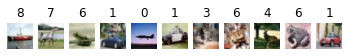

In [ ]:
for datas,label in test_loader:
  for idx, data in enumerate(datas):
    if idx > 10: break
    data = np.transpose(data,axes=(1,2,0))
    plt.subplot(1,11,idx+1)
    plt.imshow(data)
    plt.axis('off')
    plt.title(label[idx].item())
  break


In [ ]:
# 예측
result = []
for data, label in test_loader:
  data = data.to(DEVICE)
  label = label.to(DEVICE)
  output = model(data)
  test_loss += criterion(output,label).item()
  prediction = output.max(1, keepdim =True)[1]
  result.append(prediction)
  break
prediction[:11]

tensor([[1],
        [9],
        [6],
        [1],
        [3],
        [3],
        [1],
        [5],
        [0],
        [1],
        [5]], device='cuda:0')

In [ ]:
# torch로 만든 메소드중에서 evaluate를 조금 수정하면 prediction을 만들수 있음

In [ ]:
# CNN 적용하기

In [ ]:
class CNN(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.conv1 = nn.Conv2d(3,8,3,stride=1,padding = 1)  
    self.conv2 = nn.Conv2d(8,16,3,stride=1,padding = 1) 
    self.pool = nn.MaxPool2d(2,stride=2)     
    self.fc1 = nn.Linear(16*8*8,64)
    self.fc2 = nn.Linear(64,32)
    self.fc3 = nn.Linear(32,10)
    # FC
    # self.fc = nn.Linear()
  def forward(self, x):
    x = self.conv1(x)  #  8,32,32  
    x = F.relu(x)
    x = self.pool(x)   # 8, 16, 16    
    x = self.conv2(x)  # 16,16,16    
    x = F.relu(x)
    x = self.pool(x)  # 16,8,8
    
    # FC  reshape  
    x = x.view(-1,16*8*8)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.log_softmax(x)
    return x





In [ ]:
model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
cirterion = nn.CrossEntropyLoss()
# 학습은 기존의 train 함수를 사용
# 평가도 기존의 train 함수를 사용

In [ ]:
for epoch in range(1, EPOCHS+1):
  train(model,train_loader,optimizer)
  test_loss, test_accuracy =  evaluate(model, test_loader)
  print(f"EPOCH:{epoch} , test loss:{test_loss:.4f}, test Accuracy:{test_accuracy:.2f}")

0it [00:00, ?it/s]<ipython-input-106-0accd46e6ced>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
1563it [00:10, 145.16it/s]


EPOCH:1 , test loss:0.0466, test Accuracy:45.96


1563it [00:10, 154.10it/s]


EPOCH:2 , test loss:0.0422, test Accuracy:51.33


1563it [00:10, 153.98it/s]


EPOCH:3 , test loss:0.0389, test Accuracy:55.54


1563it [00:10, 153.30it/s]


EPOCH:4 , test loss:0.0365, test Accuracy:58.43


1563it [00:10, 152.68it/s]


EPOCH:5 , test loss:0.0366, test Accuracy:58.71


1563it [00:10, 145.80it/s]


EPOCH:6 , test loss:0.0348, test Accuracy:60.26


1563it [00:10, 156.24it/s]


EPOCH:7 , test loss:0.0356, test Accuracy:59.66


1563it [00:10, 155.96it/s]


EPOCH:8 , test loss:0.0327, test Accuracy:63.21


1563it [00:09, 156.57it/s]


EPOCH:9 , test loss:0.0331, test Accuracy:62.64


1563it [00:09, 156.40it/s]


EPOCH:10 , test loss:0.0325, test Accuracy:63.17


In [ ]:
# 파라메터 조정

In [ ]:
train_dataset = datasets.CIFAR10(root = '../data2/CIFAR_10',train=True, download = True
                                 , transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                 ])                                 
                                 )

test_dataset = datasets.CIFAR10(root = '../data2/CIFAR_10',train=False, download = True
                                ,transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                 ])
                                )
train_loader = torch.utils.data.DataLoader(dataset= train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset,batch_size=BATCH_SIZE,shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data2/CIFAR_10/cifar-10-python.tar.gz to ../data2/CIFAR_10
Files already downloaded and verified


In [ ]:
for epoch in range(1, EPOCHS+1):
  train(model,train_loader,optimizer)
  test_loss, test_accuracy =  evaluate(model, test_loader)
  print(f"EPOCH:{epoch} , test loss:{test_loss:.4f}, test Accuracy:{test_accuracy:.2f}")

0it [00:00, ?it/s]<ipython-input-106-0accd46e6ced>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
1563it [00:16, 95.86it/s]


EPOCH:1 , test loss:0.0317, test Accuracy:64.46


1563it [00:16, 95.39it/s]


EPOCH:2 , test loss:0.0314, test Accuracy:65.20


1563it [00:16, 95.19it/s]


EPOCH:3 , test loss:0.0308, test Accuracy:65.33


1563it [00:16, 96.48it/s]


EPOCH:4 , test loss:0.0304, test Accuracy:65.46


1563it [00:16, 96.46it/s]


EPOCH:5 , test loss:0.0310, test Accuracy:65.31


1563it [00:16, 95.46it/s]


EPOCH:6 , test loss:0.0300, test Accuracy:66.26


1563it [00:16, 94.92it/s]


EPOCH:7 , test loss:0.0306, test Accuracy:65.43


1563it [00:16, 96.31it/s]


EPOCH:8 , test loss:0.0300, test Accuracy:66.58


1563it [00:16, 94.68it/s]


EPOCH:9 , test loss:0.0302, test Accuracy:66.60


1563it [00:17, 91.34it/s]


EPOCH:10 , test loss:0.0296, test Accuracy:67.21


In [ ]:
#ResNet 모델 적용
# H(x)를 기존의 네트워크라고 할 때, H(x)를 복잡한 함수에 근사시키는 것 보다 
# F(x) := H(x) - x일 때, H(x) = F(x) + x이고, F(x) + x를 근사시키는 것이 더 쉬울 것이라는 아이디어에서 출발합니다. 
# 원래 Output에서 자기자신을 빼는 것이 F(x)의 정의이므로, 
# 'Residual learning'이라는 이름을 갖게 됩니다. 
# 또한, x가 F(x)를 통과하고 나서 다시 x를 더해주기 때문에 이를 Skip Connection이라고 부릅니다.

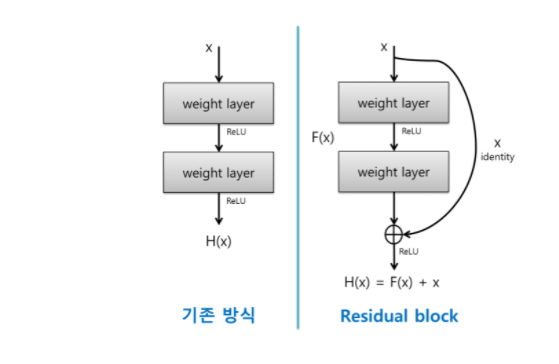

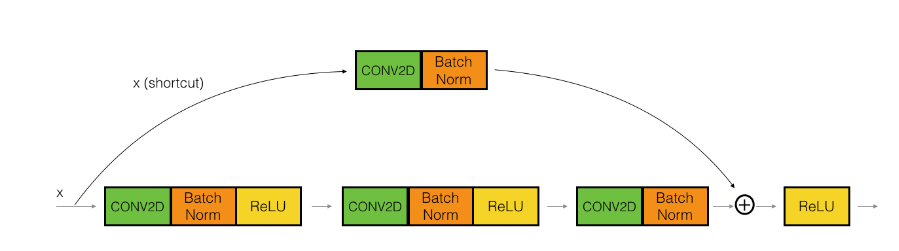

In [ ]:
# ResNet 모델 설계

In [ ]:
class BasicBlock(nn.Module):
  def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size = 3, stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size = 1, stride = stride, bias = False),
                nn.BatchNorm2d(planes))
    
  def forward(self, x):
      out = F.relu(self.bn1(self.conv1(x)))
      out = self.bn2(self.conv2(out))
      out += self.shortcut(x)
      out = F.relu(out)
      return out

class ResNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(ResNet, self).__init__()
        self.in_planes = 16
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride = 1)
        self.layer2 = self._make_layer(32, 2, stride = 2)
        self.layer3 = self._make_layer(64, 2, stride = 2)
        self.linear = nn.Linear(64, num_classes)
        
    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks  - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

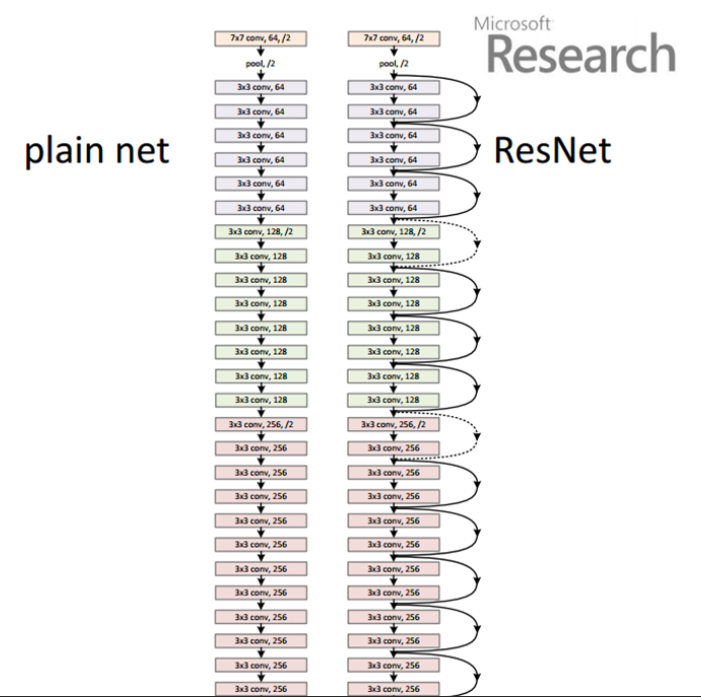

In [ ]:
model = ResNet().to(DEVICE)
print(model)


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [ ]:
for epoch in range(1, EPOCHS+1):
  train(model,train_loader,optimizer)
  test_loss, test_accuracy =  evaluate(model, test_loader)
  print(f"EPOCH:{epoch} , test loss:{test_loss:.4f}, test Accuracy:{test_accuracy:.2f}")

1563it [00:25, 61.38it/s]


EPOCH:1 , test loss:0.0738, test Accuracy:7.13


1563it [00:24, 62.54it/s]


EPOCH:2 , test loss:0.0739, test Accuracy:7.10


603it [00:09, 64.40it/s]


KeyboardInterrupt: ignored